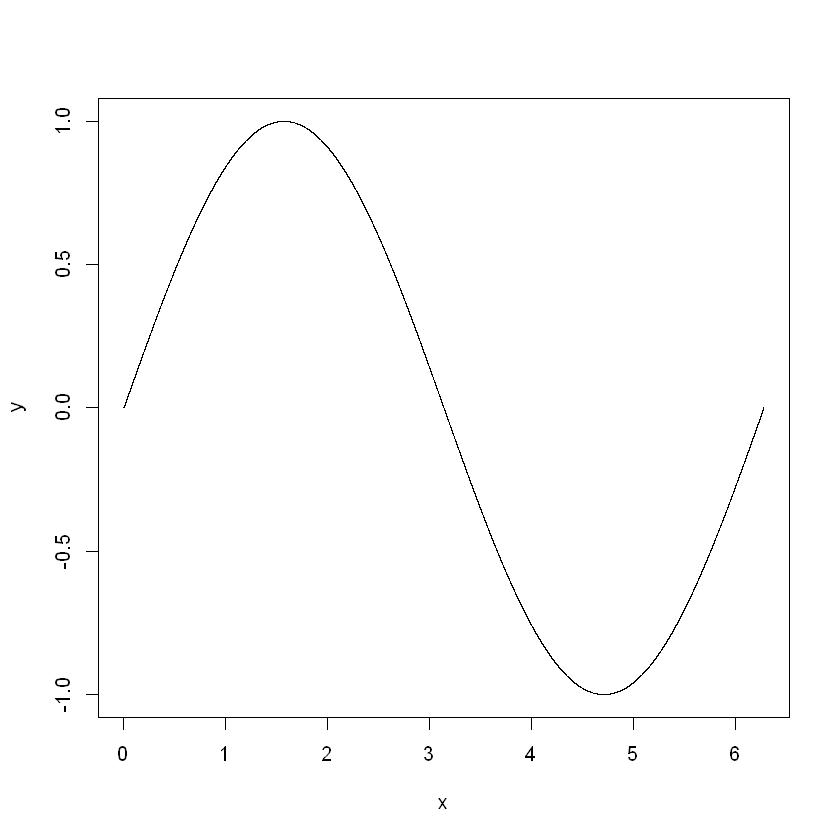

In [1]:
# Approximating the sin function as a population model
nsamples = 10000
x = seq(0, 2*pi, length = nsamples)
y = sin(x) + 0*rnorm(length(x), mean = 0, sd = 1)
plot(x, y, type = 'l', lwd = 1, lty = 1)

In [2]:
# Draw a random sample of indices 
nsamples = 2
idx = sample (c(1:length(x)), size = nsamples, replace = F)
print(idx)

[1] 7475 1182


In [3]:
# Use randomly selected indices to select data points
x_sample = x[idx]
y_sample = y[idx]
print(x_sample)
print(y_sample)

[1] 4.6965224 0.7421184
[1] -0.9998741  0.6758508


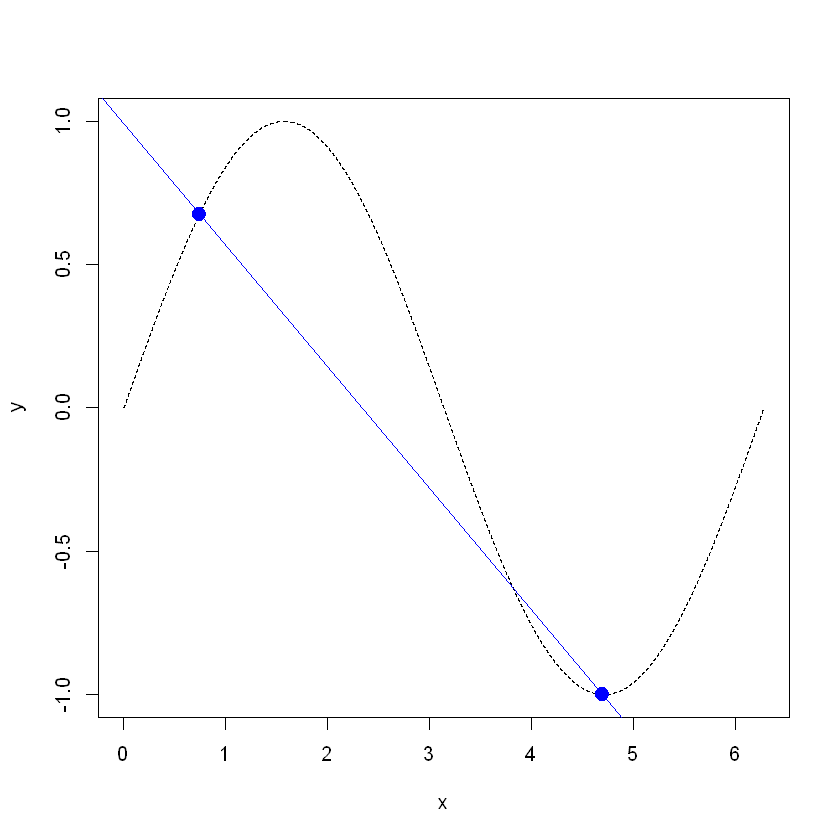

In [4]:
# Plot regression line built using dataset
plot(x, y, type = 'l', lwd = 1, lty = 2)
model = lm(y_sample~x_sample)
beta_0_hat = summary(model)$coefficients["(Intercept)", "Estimate"]
beta_1_hat = summary(model)$coefficients["x_sample", "Estimate"]
abline(beta_0_hat, beta_1_hat, lwd = 1.5, col = 'blue')
points(x_sample, y_sample, col = 'blue', pch = 19, cex = 1.5)

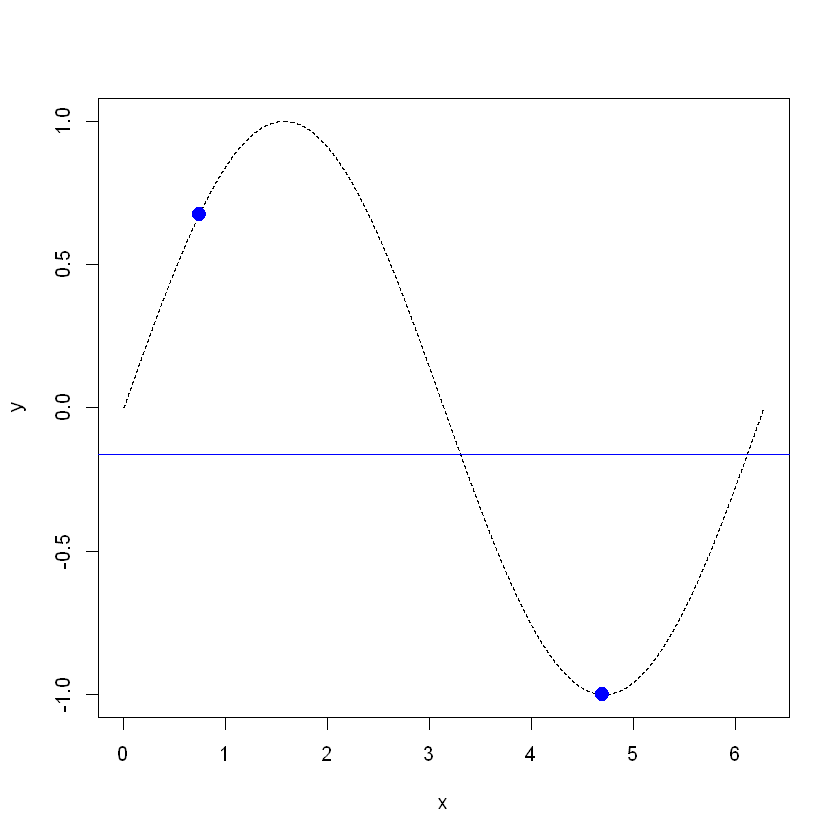

In [5]:
# Plot constant line built using dataset
plot(x, y, type = 'l', lwd = 1, lty = 2)
beta_0_hat = mean(y_sample)
beta_1_hat = 0
abline(beta_0_hat, beta_1_hat, lwd = 1.5, col = 'blue')
points(x_sample, y_sample, col = 'blue', pch = 19, cex = 1.5)

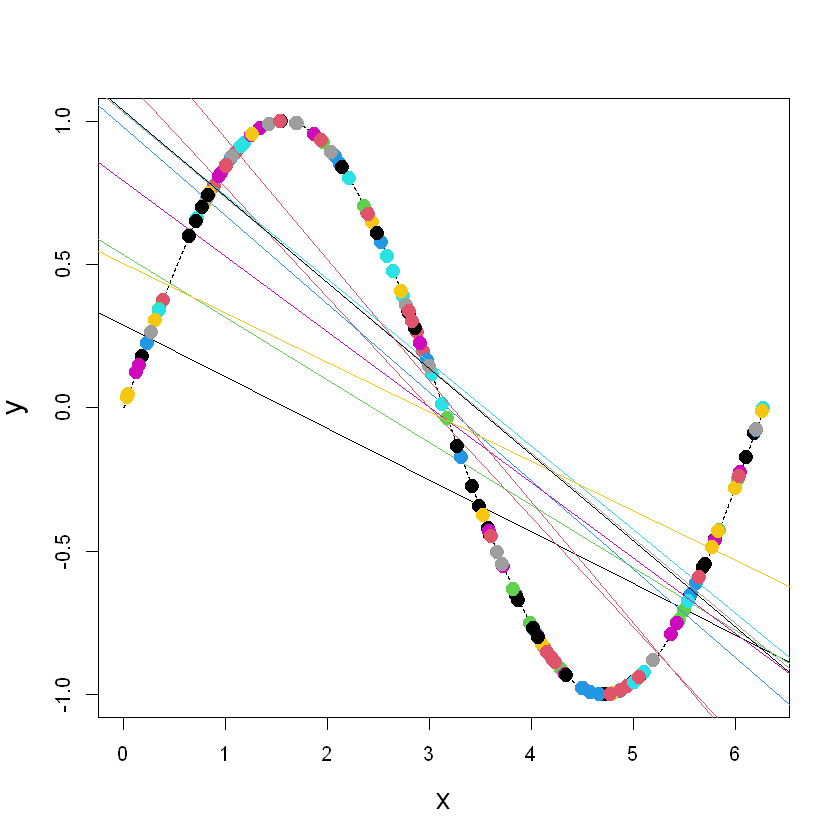

In [6]:
# Plot regression line obtained using multiple datasets
plot(x , y, type = 'l', lty = 2, lwd = 1, col = "black", xlab = "x", ylab = "y", cex.lab = 1.5)
ndatasets = 10 # similar to nsimulations or nsamples
samplesize = 16
for (j in seq(1, ndatasets)) {
  idx = sample (c(1:length(x)), size = samplesize, replace = F)
  x_sample = x[idx]
  y_sample = y[idx]
  model = lm(y_sample~x_sample)
  beta_0_hat = summary(model)$coefficients["(Intercept)", "Estimate"]
  beta_1_hat = summary(model)$coefficients["x_sample", "Estimate"]
  abline(beta_0_hat, beta_1_hat, lwd=1.5, col = j)  
  points(x_sample, y_sample, col = j, pch = 19, cex = 1.5)
}

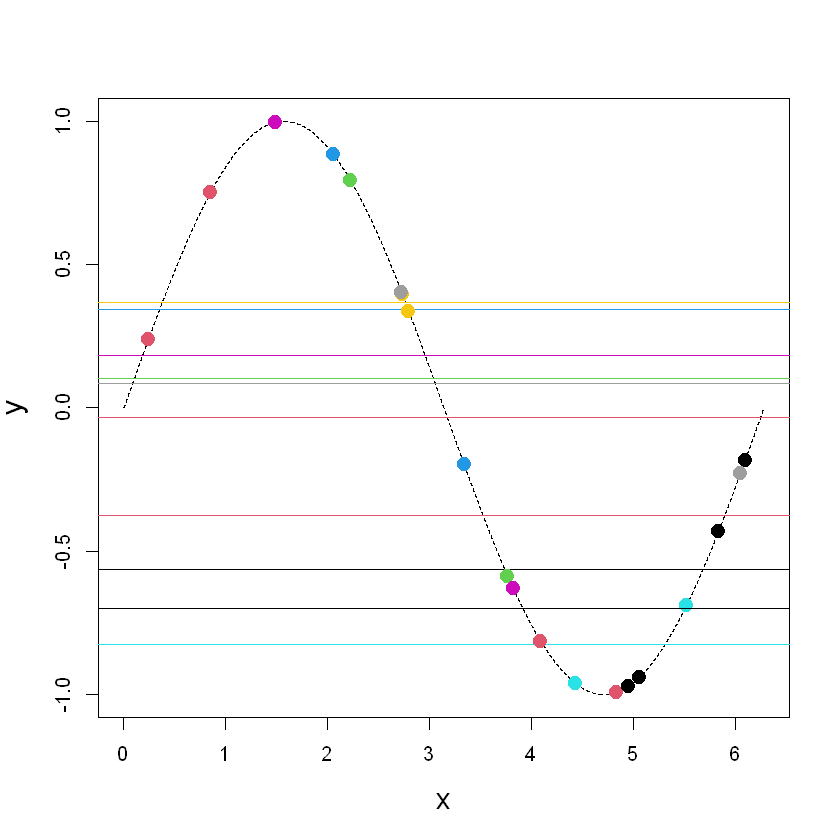

In [7]:
# Plot output of constant model obtained using several datasets
plot(x , y, type = "l", lty = 2, lwd = 1, col = "black", xlab = "x", ylab = "y", cex.lab = 1.5)
ndatasets = 10
samplesize = 2
for (j in seq(1, ndatasets)) {
  idx = sample (c(1:length(x)), size = samplesize, replace = F)
  x_sample = x[idx]
  y_sample = y[idx]
  beta_0_hat = mean(y_sample)
  beta_1_hat = 0
  abline(beta_0_hat, beta_1_hat, lwd=1.5, col = j) 
  points(x_sample, y_sample, col = j, pch = 19, cex = 1.5)
}

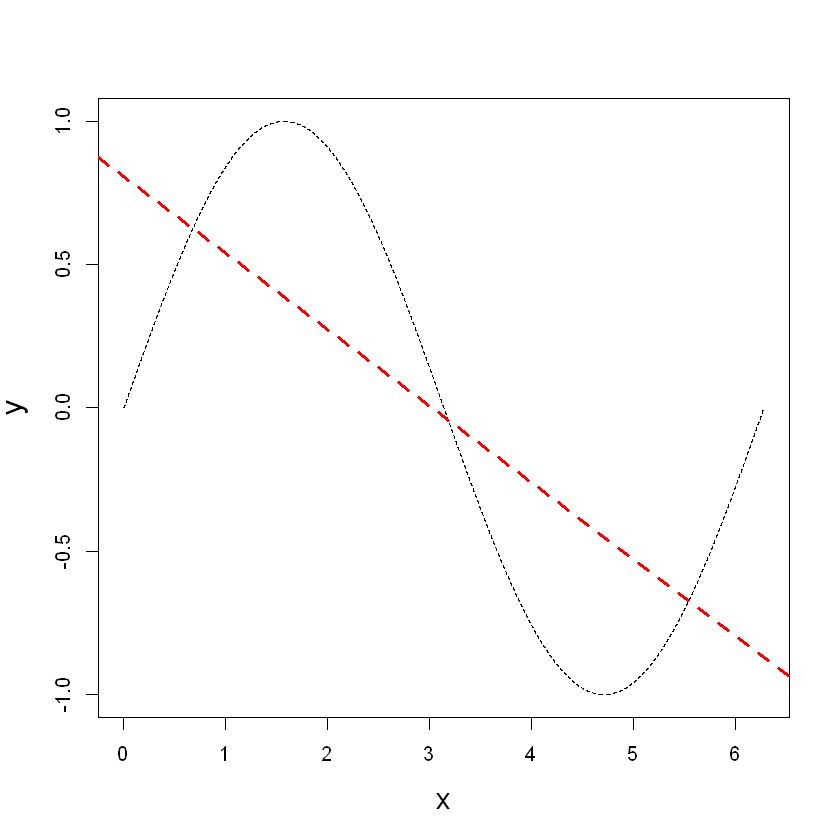

In [8]:
# Plot the average output of all regression lines
plot(x , y, type = 'l', lwd = 1, lty = 2, col = "black", xlab = "x", ylab = "y", cex.lab = 1.5)
ndatasets = 1000
samplesize = 2
for (j in seq(1,ndatasets)) {
  idx = sample (c(1:length(x)), size = samplesize, replace = F)
  x_sample = x[idx]
  y_sample = y[idx]
  model = lm(y_sample~x_sample)
  beta_0_hat[j] = summary(model)$coefficients["(Intercept)", "Estimate"]
  beta_1_hat[j] = summary(model)$coefficients["x_sample", "Estimate"]
}
beta_0_hat_avg = mean(beta_0_hat)
beta_1_hat_avg = mean(beta_1_hat)
abline(a = beta_0_hat_avg, b = beta_1_hat_avg, lwd = 2.5, lty = 2, col =  'red')

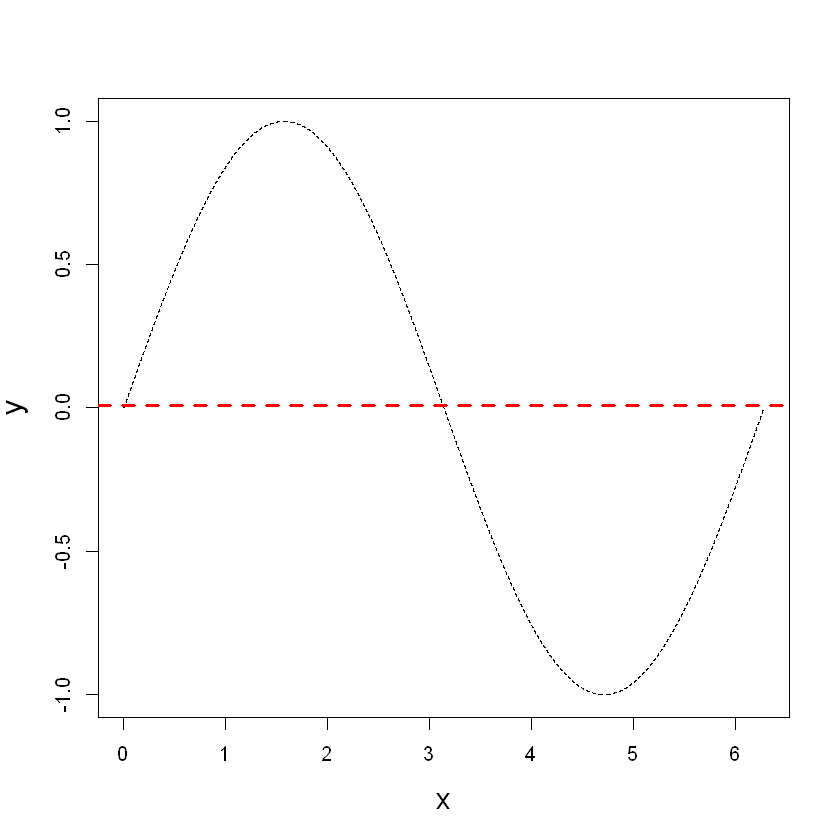

In [9]:
# Plot the average output of all constant models
plot(x , y, type = 'l', lwd = 1, lty = 2, col = "black", xlab = "x", ylab = "y", cex.lab = 1.5)
ndatasets = 1000
samplesize = 2
for (j in seq(1,ndatasets)) {
  idx = sample (c(1:length(x)), size = samplesize, replace = F)
  x_sample = x[idx]
  y_sample = y[idx]
  beta_0_hat[j] = mean(y_sample)
  beta_1_hat[j] = 0  
}
beta_0_hat_avg = mean(beta_0_hat)
beta_1_hat_avg = mean(beta_1_hat)
abline(a = beta_0_hat_avg, b = beta_1_hat_avg, lwd = 2.5, lty = 2, col = 'red')